In [191]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import *
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.neural_network import MLPClassifier
import pickle
%matplotlib inline

[nltk_data] Error loading stopwords: HTTP Error 401: Unauthorized
[nltk_data] Error loading punkt: HTTP Error 401: Unauthorized


In [2]:
df = pd.read_csv('five_movies.csv',index_col=0)

In [3]:
df.head()

,productId,userId,score,summary,review,movie_title
111469,B002LBKDYE,A1D3RZRRITKB75,5.0,If you eat you need to watch it.,Seriously ----watch this before you take that ...,"Food, Inc"
111470,B002LBKDYE,A24Y3JBTJD5R1K,5.0,For those who eat food!,"I don't know that my eating habits changed, bu...","Food, Inc"
111471,B002LBKDYE,ABND7UR0H37JW,5.0,"if you're a parent, don't miss this","Well worth the time, this engrossing and enlig...","Food, Inc"
111472,B002LBKDYE,A3EK4NS9CMXC7W,5.0,"I'm not an activist, but I do want to live a ...",When movies like this come out I am often hesi...,"Food, Inc"
111473,B002LBKDYE,A1LIDERT7U0NN8,5.0,Well Worth Your Time,I am always hesitant to watch certain document...,"Food, Inc"


In [4]:
df.shape

(4366, 6)

In [5]:
iron_man['is_duplicate'] = iron_man.review.duplicated(keep='first')

NameError: name 'iron_man' is not defined

In [25]:
iron_man.head()

,productId,userId,score,summary,review,is_duplicate
517024,B001FZ9AAU,A10RMS4T6P76M4,5.0,"Excellent, action packed, and fun!",I really enjoyed this movie. Robert Downey Jr...,False
517025,B001FZ9AAU,A2JEONEOLE4FD2,5.0,Ironman proves there are heroes beyond Spidey...,This is a great entertainer done very well. Bu...,False
517026,B001FZ9AAU,A3LH77PBDFEO3F,5.0,Guilty Pleasue of a movie!,"I have never been a comic book guy, and super ...",False
517027,B001FZ9AAU,A6BRC4D9NZJFK,5.0,highly recommended,how can you not love this movie<br />excellent...,False
517028,B001FZ9AAU,A2C62X7R904NKM,4.0,Robert Downey Jr. actually does it as a super...,I think that movie makers have to wait till th...,False


In [26]:
iron_man.is_duplicate.value_counts()

True     7398
False     924
Name: is_duplicate, dtype: int64

In [27]:
iron_man = iron_man[iron_man.is_duplicate == False]

In [28]:
iron_man.shape

(924, 6)

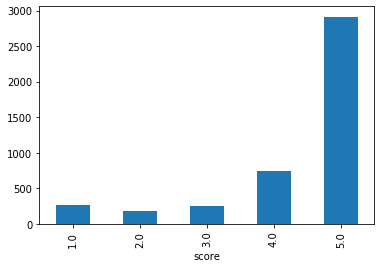

In [6]:
df.groupby('score').review.count().plot.bar(ylim=0)
plt.show()


In [164]:
df.groupby('score').review.count()/sum(df.groupby('score').review.count())

score
1.0    0.062300
2.0    0.041228
3.0    0.057719
4.0    0.171553
5.0    0.667201
Name: review, dtype: float64

In [89]:
df['review']=df['review'].str.lower()

In [90]:
stop_words = stopwords.words('english') + list(string.punctuation) + list('br')
wnl = WordNetLemmatizer()
df['cleaned'] = df['review'].apply(lambda x: " ".join([wnl.lemmatize(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stop_words]).lower())

In [91]:
df['cleaned']

111469     seriously watch take next bite br really want ...
111470     know eating habit changed defiantly became inf...
111471     well worth time engrossing enlightening film o...
111472     movie like come often hesitant watch activist ...
111473     always hesitant watch certain documentary many...
111474     important work really opened eye business food...
111475     good cry watching film make wonder hell went w...
111476     watched movie expecting another peta style fil...
111477     movie certainly one best documentary seen year...
111478     moved uk u recently get cheap fast food watch ...
111479     eat movie liberal hysteric usually cynical opi...
111480     food inc gospel fact show whole picture going ...
111481     documentary well done extremely informative tr...
111482     great movie allows see food come process make ...
111483     put together let know happening food never abl...
111484     going give youself heart attack think eat jare...
111485     make wonder f

In [92]:
df.head()

,productId,userId,score,summary,review,movie_title,cleaned
111469,B002LBKDYE,A1D3RZRRITKB75,5.0,If you eat you need to watch it.,seriously ----watch this before you take that ...,"Food, Inc",seriously watch take next bite br really want ...
111470,B002LBKDYE,A24Y3JBTJD5R1K,5.0,For those who eat food!,"i don't know that my eating habits changed, bu...","Food, Inc",know eating habit changed defiantly became inf...
111471,B002LBKDYE,ABND7UR0H37JW,5.0,"if you're a parent, don't miss this","well worth the time, this engrossing and enlig...","Food, Inc",well worth time engrossing enlightening film o...
111472,B002LBKDYE,A3EK4NS9CMXC7W,5.0,"I'm not an activist, but I do want to live a ...",when movies like this come out i am often hesi...,"Food, Inc",movie like come often hesitant watch activist ...
111473,B002LBKDYE,A1LIDERT7U0NN8,5.0,Well Worth Your Time,i am always hesitant to watch certain document...,"Food, Inc",always hesitant watch certain documentary many...


In [93]:
df['cleaned'].head()

111469    seriously watch take next bite br really want ...
111470    know eating habit changed defiantly became inf...
111471    well worth time engrossing enlightening film o...
111472    movie like come often hesitant watch activist ...
111473    always hesitant watch certain documentary many...
Name: cleaned, dtype: object

In [94]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['cleaned']).toarray()
final_features.shape

(4366, 19941)

In [95]:
#first we split our dataset into testing and training set:
# this block is to split the dataset into training and testing set 
X = df['cleaned']
Y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [96]:
X_train.head()

111968     must see documentary dire state food supply pa...
4943140    post production converted br br rating based m...
4028284    one best movie showcase hd capability popped p...
809464     accidentally ordered wrong item begin able can...
4027706    anchored top rate performance robert downey jr...
Name: cleaned, dtype: object

In [97]:
X_test.head()

4027987    good movie got fast advertised checking movie ...
111711     amazing type movie documentary investigative f...
4028185    movie like iron man restore even bitter critic...
4028391    given praise excitement surrounding dark knigh...
4028260    best action movie ever robert downey jr perfec...
Name: cleaned, dtype: object

In [98]:
y_train.head()

111968     5.0
4943140    2.0
4028284    5.0
809464     5.0
4027706    5.0
Name: score, dtype: float64

In [99]:
y_test.head()

4027987    5.0
111711     5.0
4028185    5.0
4028391    3.0
4028260    5.0
Name: score, dtype: float64

In [100]:
print(df['cleaned'].iloc[1])

know eating habit changed defiantly became informed food industry br br must see video generation


In [119]:
# instead of doing these steps one at a time, we can use a pipeline to complete them all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', MultinomialNB())])

In [120]:
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
with open('clf.pkl', 'wb') as f:
    pickle.dump(model, f)
ytest = np.array(y_test)

In [192]:
# creating bag of words model 
cv = CountVectorizer(max_features = 1500) 
X = cv.fit_transform(X_train).toarray() 
y = y_train.values 
X_test_transform = cv.fit_transform(X_test).toarray()
y_test_transform = y_test.values

In [199]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 

#classifier = MultinomialNB()
classifier = MultinomialNB(alpha=0.001, class_prior=[0.062300, 0.041228, 0.057719, 0.171553, 0.667201], fit_prior=True); 
classifier.fit(X, y) 

MultinomialNB(alpha=0.001,
              class_prior=[0.0623, 0.041228, 0.057719, 0.171553, 0.667201],
              fit_prior=True)

In [200]:
# predicting test set results 
y_pred = classifier.predict(X_test_transform) 
  
# making the confusion matrix 
cm = confusion_matrix(y_test_transform, y_pred) 
cm 

array([[  1,   1,   1,  14,  67],
       [  0,   1,   0,   8,  38],
       [  0,   1,   1,  14,  58],
       [  2,   1,   1,  52, 132],
       [  3,   4,   7, 118, 567]])

In [201]:
print(classification_report(y_test_transform, y_pred))

              precision    recall  f1-score   support

         1.0       0.17      0.01      0.02        84
         2.0       0.12      0.02      0.04        47
         3.0       0.10      0.01      0.02        74
         4.0       0.25      0.28      0.26       188
         5.0       0.66      0.81      0.73       699

    accuracy                           0.57      1092
   macro avg       0.26      0.23      0.21      1092
weighted avg       0.49      0.57      0.52      1092



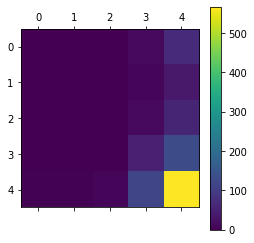

In [205]:
plt.matshow(confusion_matrix(y_test_transform, y_pred))
plt.colorbar()

In [121]:
ytest[:50]

array([5., 5., 5., 3., 5., 5., 4., 5., 1., 4., 1., 5., 5., 5., 5., 3., 5.,
       4., 5., 5., 4., 5., 5., 4., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 4., 1., 5., 2., 5., 1., 5., 4., 1., 5., 5., 4., 4., 5., 3.])

In [168]:
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        84
         2.0       0.00      0.00      0.00        47
         3.0       0.00      0.00      0.00        74
         4.0       0.00      0.00      0.00       188
         5.0       0.64      1.00      0.78       699

    accuracy                           0.64      1092
   macro avg       0.13      0.20      0.16      1092
weighted avg       0.41      0.64      0.50      1092



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [110]:
print(confusion_matrix(ytest, model.predict(X_test)))

[[  8   0   3  10  63]
 [  3   1   0   5  38]
 [  2   0   2   9  61]
 [  1   1   3  25 158]
 [  5   0   1  53 640]]
